In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 5th Requirement

Due to your immense help, your friend startup successfully got seed funding and it is on the operational mode. Now your friend wants to expand his startup and he is looking for new investors for his startup. Now you again come as a saviour to help your friend and want to create a list of probable new new investors. Before moving forward you remember your investor friend advice that finding the investors by analysing the investment type. Since your friend startup is not in early phase it is in growth stage so the best-suited investment type is Private Equity. Find the top 5 investors who have invested in a different number of startups and their investment type is Private Equity. Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake. You can find this by printing unique values from this column. There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

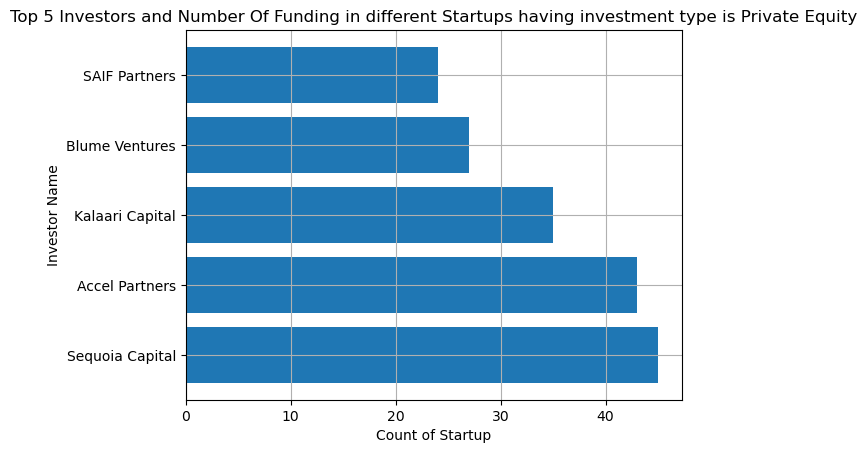

,Investors,Investment count
0,Sequoia Capital,45
1,Accel Partners,43
2,Kalaari Capital,35
3,Blume Ventures,27
4,SAIF Partners,24


In [4]:
#Importing dataset
dataset = 'startup_funding.csv'
df = pd.read_csv(dataset)

#Removing NaN values
df.dropna(subset=['InvestorsName','StartupName','InvestmentType'], inplace=True)

#Found unique values using pd.unique(df['InvestmentType']) and made the below replacing statements accordingly

#Correcting important startup's name and funding name
df['StartupName'].replace('Flipkart.com', 'Flipkart',inplace=True)
df['StartupName'].replace('Paytm Marketplace', 'Paytm',inplace=True)
df['StartupName'].replace(to_replace =['Ola Cabs','Olacabs'], value='Ola',inplace=True)
df['StartupName'].replace(to_replace =['OYO Rooms','Oyo Rooms', 'OyoRooms', 'Oyorooms'], value ='Oyo',inplace=True)
df['InvestmentType'].replace('Crowd funding', 'Crowd Funding',inplace=True)
df['InvestmentType'].replace('SeedFunding', 'Seed Funding',inplace=True)
df['InvestmentType'].replace('PrivateEquity', 'Private Equity',inplace=True)


#removing undiclosed investors
remove_value= ['Undisclosed Investors','Undisclosed investors','undisclosed investor', 'undisclosed investors']
df = df[df['InvestorsName'].isin(remove_value) == False]

#splitting the investors column values and storing it in a list
def separate(s):
    return s.strip().split(',')

df['InvestorsName'] = df['InvestorsName'].apply(separate)

#selecting only data which requires analysis i.e where investment type is Private Equity
df = df[['StartupName','InvestorsName','InvestmentType']]
df = df[(df['InvestmentType'] =='Private Equity' )]

#resetting the index
df.reset_index(inplace=True)

#dict for stroing investor name as key and startup name as values
dic = {}
for i in range(df.shape[0]):
    #getting the length of each list(whether there is only 1 investor or multiple)
    length = len(df['InvestorsName'][i])
    
    investor_name = df['InvestorsName'][i]
    startup_name = df['StartupName'][i].strip()
    
    #if only one investor then just get the name and create an entry in dict
    if length == 1:
        i_name = investor_name[0].strip()
        if dic.get(i_name) is None:
            s_list = []
            s_list.append(startup_name)
            dic[i_name] = s_list
        else:
            s_list = dic.get(i_name)
            if startup_name not in s_list:
                s_list.append(startup_name)
                dic[i_name] = s_list
    
    #if multiple investors split it into array and check individually same as above just with a for loop          
    else:
        for j in investor_name:
            i_name = j.strip()
            if i_name != '':
                if dic.get(i_name) is None:
                    s_list = []
                    s_list.append(startup_name)
                    dic[i_name] = s_list
                else:
                    s_list = dic.get(i_name)
                    if startup_name not in s_list:
                        s_list.append(startup_name)
                        dic[i_name] = s_list 

#counting the no. of startup an investor has invested in
investors_count = {}
for k,v in dic.items():
    if investors_count.get(k) is None:
        investors_count[k] = len(v)

#sorting the values so that we'd have top investors in descending order
sorted_dict = {}
sorted_values = sorted(investors_count.values(), reverse=True)

for i in sorted_values:
    for k in investors_count.keys():
        if investors_count[k] == i:
            sorted_dict[k] = i

top_investors = list(sorted_dict.keys())
top_investors_investment_count = list(sorted_dict.values())



#plotting a graph
plt.barh(top_investors[:5], top_investors_investment_count[:5])
plt.xlabel("Count of Startup")
plt.ylabel("Investor Name")
plt.title("Top 5 Investors and Number Of Funding in different Startups having investment type is Private Equity")
plt.grid()
plt.show()


#displaying data 
result_data = list(zip(top_investors[:5], top_investors_investment_count[:5]))
final_df = pd.DataFrame(result_data, columns=['Investors','Investment count'])
final_df